In [165]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from collections import Counter

In [166]:
df = pd.read_csv('data_bai2.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head(10)

,STT,Họ và tên,MSSV,Giới tính,Khóa,Khoa,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,Phạm Tiến Hưng,23632401,1,3,Động lực,4,3,4,3,5,4,4,3,3,3,Không có,Không có,Không có
1,2,Lê Ngọc Trường Giang,24697331,1,4,Thương mại du lịch,3,3,4,3,5,4,5,5,4,5,Không có,Không có,Không có
2,3,Nguyễn Thị Trúc Hà,24696461,2,4,Quản trị kinh doanh,3,4,2,5,4,4,4,2,4,3,Không có,Không có,Không có
3,4,Mohammad Hanufi,23704721,1,3,Quản trị kinh doanh,3,3,3,4,3,4,5,3,4,4,Không có ý kiến,Tốt,Nâng cao hệ thống máy tính
4,5,Lê Minh Thắng,23687491,1,3,Quản trị kinh doanh,3,3,3,4,5,3,4,3,3,3,"Phòng trang bị thêm máy, Có thể cho thêm ghế ngồi",Cố hiền dễ thương,Không có
5,6,Đoàn Ngọc Mỹ Tâm,23640421,2,3,Quản trị kinh doanh,5,5,5,5,5,5,5,5,5,5,Thay thế máy tính mới,Tốt,Không có
6,7,Phùng Thị Như Quỳnh,23640511,2,3,Quản trị kinh doanh,5,5,4,5,4,4,5,4,5,4,Không,Vui vẻ,Không
7,8,Võ Lê Ánh Thu,23715711,2,3,Quản trị kinh doanh,4,5,5,5,5,4,5,5,5,4,Thể bố trí thêm nhiều bàn tự học hơn,Thân thiện,Không
8,9,Đăng Thị Thúy Ngân,24707631,2,4,Kế toán,4,4,3,2,5,5,4,4,4,4,Không có,Không có,Không có
9,10,Huỳnh Thị Mỹ Duyên,23722431,2,3,Thương mại du lịch,4,5,4,5,4,4,4,4,5,4,Không có,"Nghiêm túc, quản lý tốt",Không có


## Mô tả chung về dữ liệu:
- Dữ liệu là những thông tin thu được sau khi thực hiện cuộc khảo sát đối với sinh viên trường **Đại học Công nghiệp Thành phố Hồ Chí Minh**, với ý nghĩa các cột cụ thể như sau:
    + *STT*: số thứ tự
    + *Họ và tên*: họ và tên đầy đủ của sinh viên được khảo sát
    + *MSSV*: mã số sinh viên của sinh viên được khảo sát
    + *Giới tính*: giới tính của sinh viên được khảo sát (****1: Nam; 2: Nữ****)
    + *Khóa*: khóa mà sinh viên được khảo sát đang theo học (****1: K17; 2: K18; 3: K19; 4: K20; 5: Khác****)
    + *Khoa*: khoa mà sinh viên được khảo sát đang theo học
    + Các cột *1-10* (các câu hỏi định lượng): các câu hỏi khảo sát về mức độ đồng ý của sinh viên được thiết kế theo thang đo Likert với số điểm từ *1 đến 5* ứng với các mức độ từ **Hoàn toàn không đồng ý** đến **Hoàn toàn đồng ý**. Các câu hỏi này được chia vào *2* nhóm: 
        * **Nhóm 1** (các câu hỏi *1-5*): khảo sát về mức độ hài lòng của sinh viên về **Các thiết bị điện tử và kết nối mạng**
        * **Nhóm 2** (các câu hỏi *6-10*): khảo sát về mức độ hài lòng của sinh viên về **Không gian thư viện**
    + Các cột *11-13* (các câu hỏi định tính): các câu hỏi với câu trả lời dạng text
- Trong bộ dữ liệu này:
    + Các cột *Họ và tên, MSSV, Giới tính, Khóa, Khoa* là các cột **đặc trưng cá nhân** của từng sinh viên
    + Các cột *1-13* là các *biến quan sát* dùng để **phân tích** và **trực quan hóa dữ liệu**

In [167]:
"""Tổng số phiếu đã khảo sát"""
len(df)

60

In [168]:
"""Một số mô tả cơ bản khác"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   STT        60 non-null     int64 
 1   Họ và tên  60 non-null     object
 2   MSSV       60 non-null     int64 
 3   Giới tính  60 non-null     int64 
 4   Khóa       60 non-null     int64 
 5   Khoa       60 non-null     object
 6   1          60 non-null     int64 
 7   2          60 non-null     int64 
 8   3          60 non-null     int64 
 9   4          60 non-null     int64 
 10  5          60 non-null     int64 
 11  6          60 non-null     int64 
 12  7          60 non-null     int64 
 13  8          60 non-null     int64 
 14  9          60 non-null     int64 
 15  10         60 non-null     int64 
 16  11         60 non-null     object
 17  12         60 non-null     object
 18  13         60 non-null     object
dtypes: int64(14), object(5)
memory usage: 9.0+ KB


In [169]:
"""Các khoa xuất hiện trong bộ dữ liệu khảo sát"""
print(df['Khoa'].unique())

['Động lực' 'Thương mại du lịch' 'Quản trị kinh doanh' 'Kế toán'
 'Công nghệ điện' 'Công nghệ thông tin' 'Công nghệ nhiệt'
 'Công nghệ điện tử' 'Ngoại ngữ' 'Công nghệ động lực']


## Các thống kê cơ bản

In [170]:
#  Thực hiện đổi tên cột
df.columns = ['stt', 'ho_ten', 'mssv', 'gioi_tinh', 'khoa_hoc', 'khoa', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13']
df.head(10)

,stt,ho_ten,mssv,gioi_tinh,khoa_hoc,khoa,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13
0,1,Phạm Tiến Hưng,23632401,1,3,Động lực,4,3,4,3,5,4,4,3,3,3,Không có,Không có,Không có
1,2,Lê Ngọc Trường Giang,24697331,1,4,Thương mại du lịch,3,3,4,3,5,4,5,5,4,5,Không có,Không có,Không có
2,3,Nguyễn Thị Trúc Hà,24696461,2,4,Quản trị kinh doanh,3,4,2,5,4,4,4,2,4,3,Không có,Không có,Không có
3,4,Mohammad Hanufi,23704721,1,3,Quản trị kinh doanh,3,3,3,4,3,4,5,3,4,4,Không có ý kiến,Tốt,Nâng cao hệ thống máy tính
4,5,Lê Minh Thắng,23687491,1,3,Quản trị kinh doanh,3,3,3,4,5,3,4,3,3,3,"Phòng trang bị thêm máy, Có thể cho thêm ghế ngồi",Cố hiền dễ thương,Không có
5,6,Đoàn Ngọc Mỹ Tâm,23640421,2,3,Quản trị kinh doanh,5,5,5,5,5,5,5,5,5,5,Thay thế máy tính mới,Tốt,Không có
6,7,Phùng Thị Như Quỳnh,23640511,2,3,Quản trị kinh doanh,5,5,4,5,4,4,5,4,5,4,Không,Vui vẻ,Không
7,8,Võ Lê Ánh Thu,23715711,2,3,Quản trị kinh doanh,4,5,5,5,5,4,5,5,5,4,Thể bố trí thêm nhiều bàn tự học hơn,Thân thiện,Không
8,9,Đăng Thị Thúy Ngân,24707631,2,4,Kế toán,4,4,3,2,5,5,4,4,4,4,Không có,Không có,Không có
9,10,Huỳnh Thị Mỹ Duyên,23722431,2,3,Thương mại du lịch,4,5,4,5,4,4,4,4,5,4,Không có,"Nghiêm túc, quản lý tốt",Không có


#### Thống kê về giới tính của đối tượng tham gia khảo sát

In [171]:
# Đếm số lượng sinh viên theo giới tính
gender_count = df.gioi_tinh.value_counts().reset_index()
gender_count.columns = ['gioi_tinh', 'so_luong']
gender_count.gioi_tinh = gender_count.gioi_tinh.replace({1: 'Nam', 2: 'Nữ'})
gender_count

,gioi_tinh,so_luong
0,Nam,45
1,Nữ,15


In [172]:
def custom_autopct(pct):
    return '%1.1f%%' % pct if pct > 0 else ''

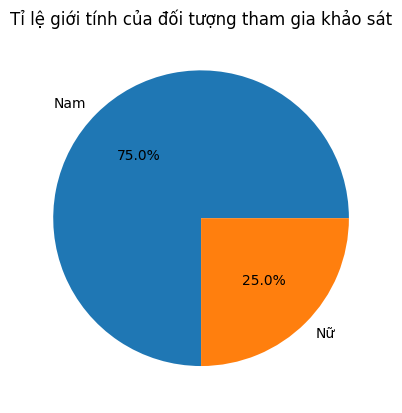

In [173]:
plt.pie(gender_count.so_luong, labels=gender_count.gioi_tinh, autopct=custom_autopct)
plt.title('Tỉ lệ giới tính của đối tượng tham gia khảo sát')
plt.savefig('../images/gender.png', dpi=300)
plt.show();

#### Thống kê về khóa học của đối tượng tham gia khảo sát

In [174]:
# Khai báo toàn bộ các khóa học trong khảo sát
khoa_hoc_all = pd.DataFrame({'khoa_hoc': ['K17', 'K18', 'K19', 'K20', 'Khac']})

# Đếm số lượng sinh viên theo khóa học thu được sau khi khảo sát
khoa_hoc_count = df.khoa_hoc.value_counts().reset_index()
khoa_hoc_count.columns = ['khoa_hoc', 'so_luong']
khoa_hoc_count.khoa_hoc = khoa_hoc_count.khoa_hoc.replace({1: 'K17', 2: 'K18', 3: 'K19', 4: 'K20', 5: 'Khac'})
final_count = pd.merge(khoa_hoc_all, khoa_hoc_count, on='khoa_hoc', how='left').fillna(0).astype({'so_luong': int})
final_count

,khoa_hoc,so_luong
0,K17,0
1,K18,3
2,K19,54
3,K20,3
4,Khac,0


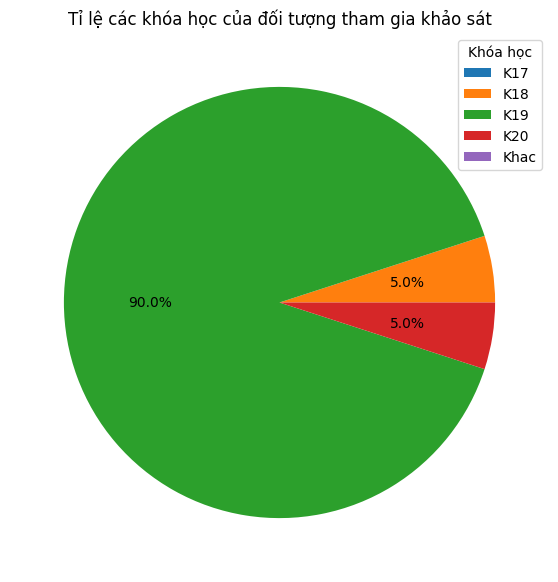

In [175]:
plt.figure(figsize=(7, 7))
plt.pie(final_count.so_luong, labels=None, autopct=custom_autopct)
plt.title('Tỉ lệ các khóa học của đối tượng tham gia khảo sát')
plt.legend(final_count.khoa_hoc, title='Khóa học')
plt.savefig('../images/khoa_hoc.png', dpi=300)
plt.show();

#### Thống kê dữ liệu các câu hỏi

In [176]:
likert = pd.DataFrame({'diem': [1, 2, 3, 4, 5]})
likert_descript = [
    '1: Hoàn toàn không đồng ý',
    '2: Không đồng ý',
    '3: Bình thường',
    '4: Đồng ý',
    '5: Hoàn toàn đồng ý'
]
quest = {
        'q1': 'Câu 1: Thư viện có đủ số lượng máy tính để đáp ứng đủ nhu cầu sử dụng của sinh viên.',
        'q2': 'Câu 2: Các máy tính trong thư viện hoạt động tốt, không bị giật lag khi sử dụng.', 
        'q3': 'Câu 3: Bàn ghế và ổ cắm điện tại khu vực máy tính được bố trí hợp lý, thuận tiện cho sinh viên học tập.', 
        'q4': 'Câu 4: Tình trạng mạng Wifi trong thư viện hoạt động ổn định và dễ dàng truy cập.',
        'q5': 'Câu 5: Hệ thống máy lạnh trong thư viện hoạt động tốt.',
        'q6': 'Câu 6: Không gian thư viện đủ rộng có thể phục vụ cho số lượng lớn sinh viên cùng lúc.', 
        'q7': 'Câu 7: Môi trường học tập trong thư viện yên tĩnh, giúp sinh viên tập trung hơn khi học.',
        'q8': 'Câu 8: Số lượng phòng họp nhóm đáp ứng được nhu cầu làm việc nhóm của sinh viên.',
        'q9': 'Câu 9: Cơ sở vật chất trong các phòng họp nhóm ở thư viện luôn được trang bị đầy đủ.',
        'q10': 'Câu 10: Khu vực ngồi nghỉ của sinh viên tại thư viện được bố trí hợp lý.',
        'q11': 'Câu 11: Theo bạn, thư viện trường Đại học Công nghiệp Thành phố Hồ Chí Minh cần cải thiện những gì để nâng cao chất lượng dịch vụ?',
        'q12': 'Câu 12: Bạn có nhận xét thế nào về chất lượng phục vụ của cán bộ thư viện trường Đại học Công nghiệp Thành phố Hồ Chí Minh?',
        'q13': 'Câu 13: Bạn có muốn thư viện trường Đại học Công nghiệp Thành phố Hồ Chí Minh thay thế/nâng cấp thiết bị nào không?'
        }

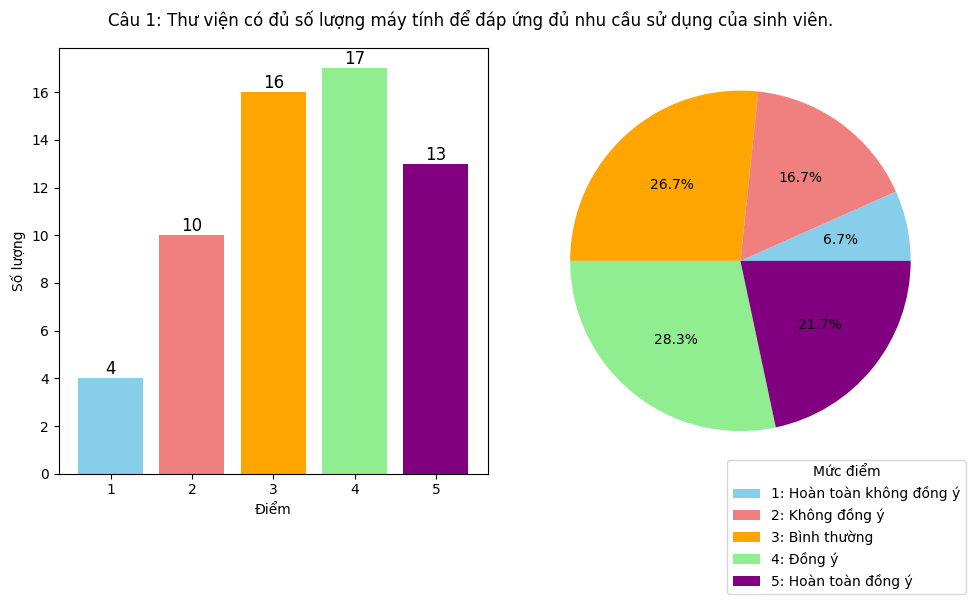

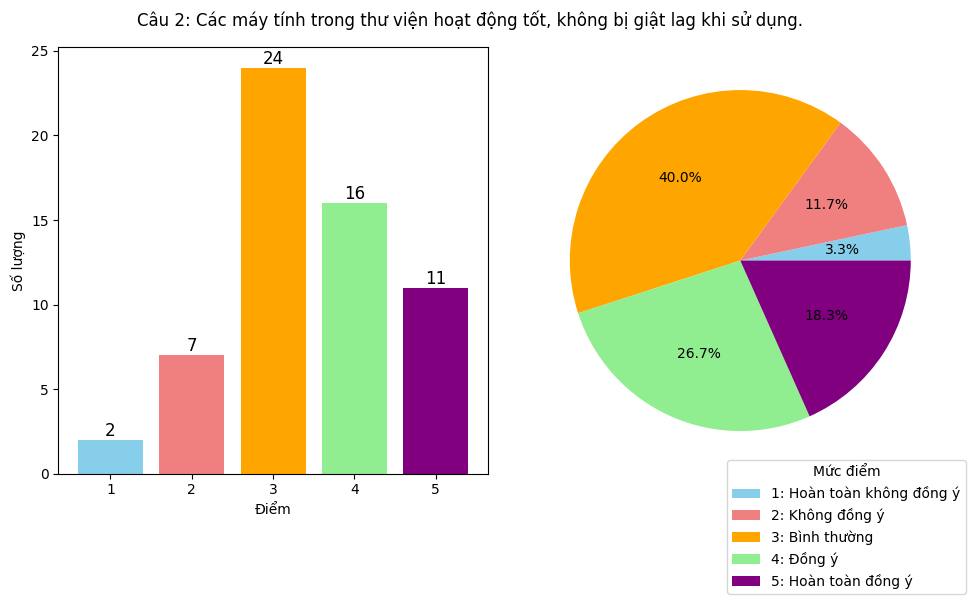

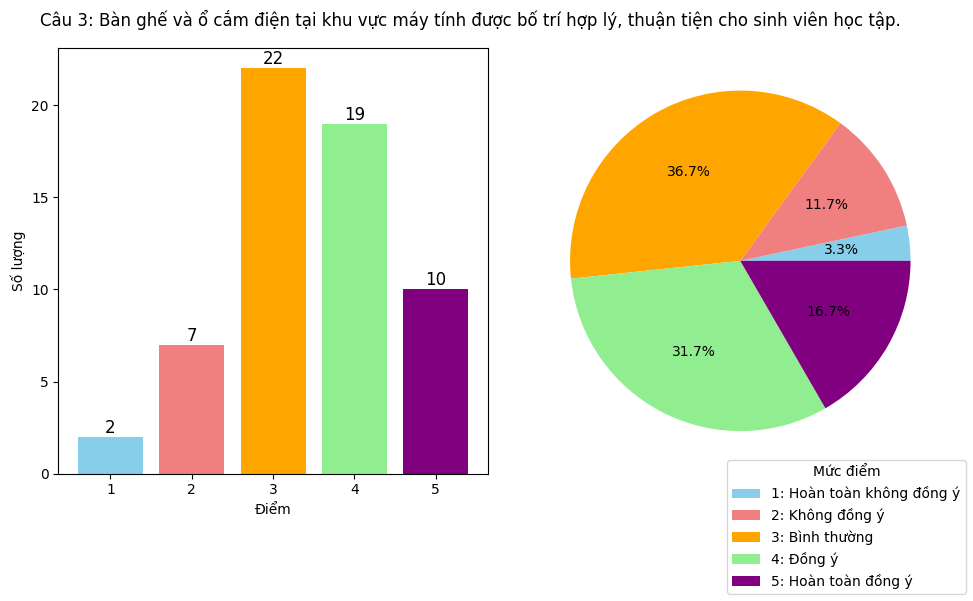

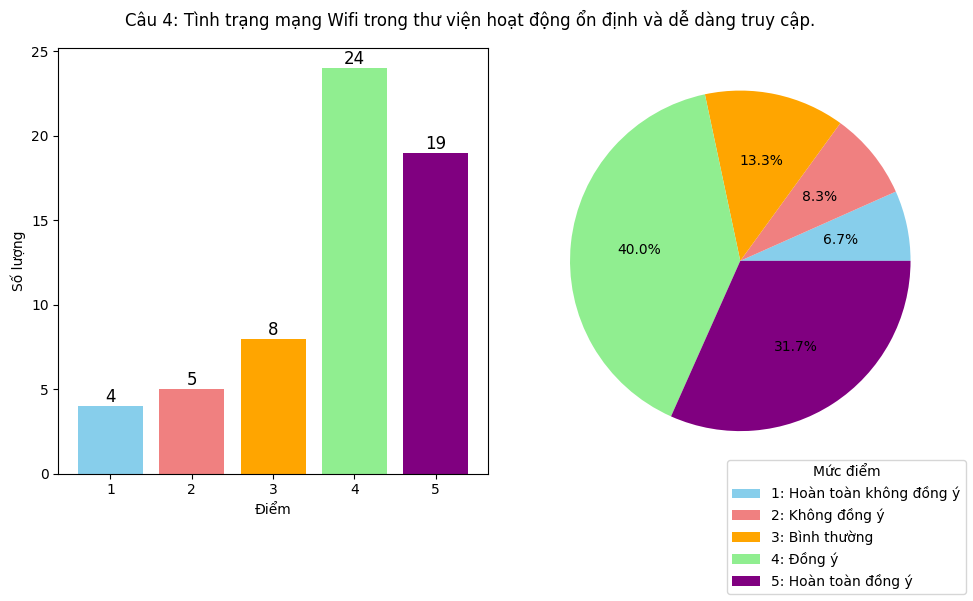

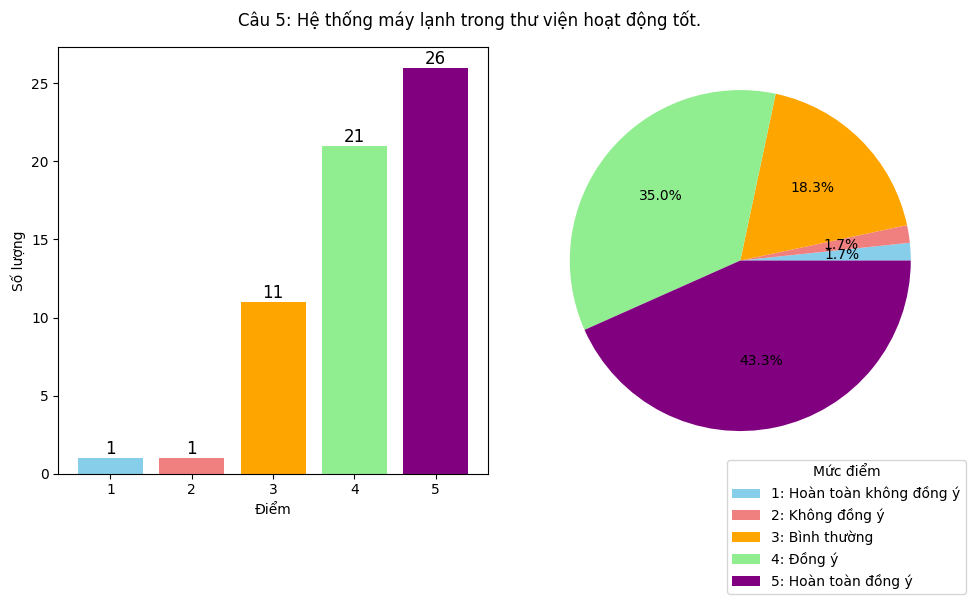

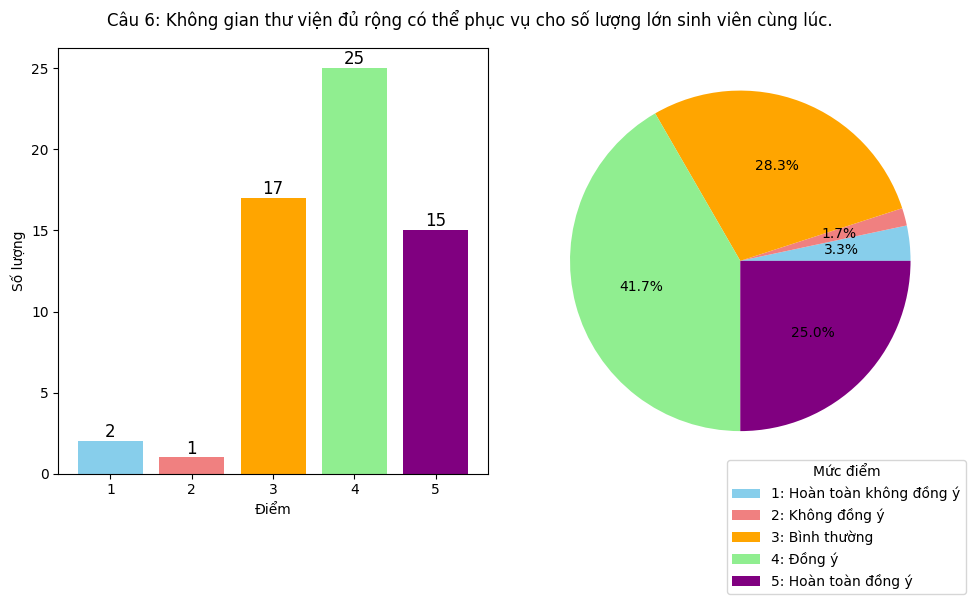

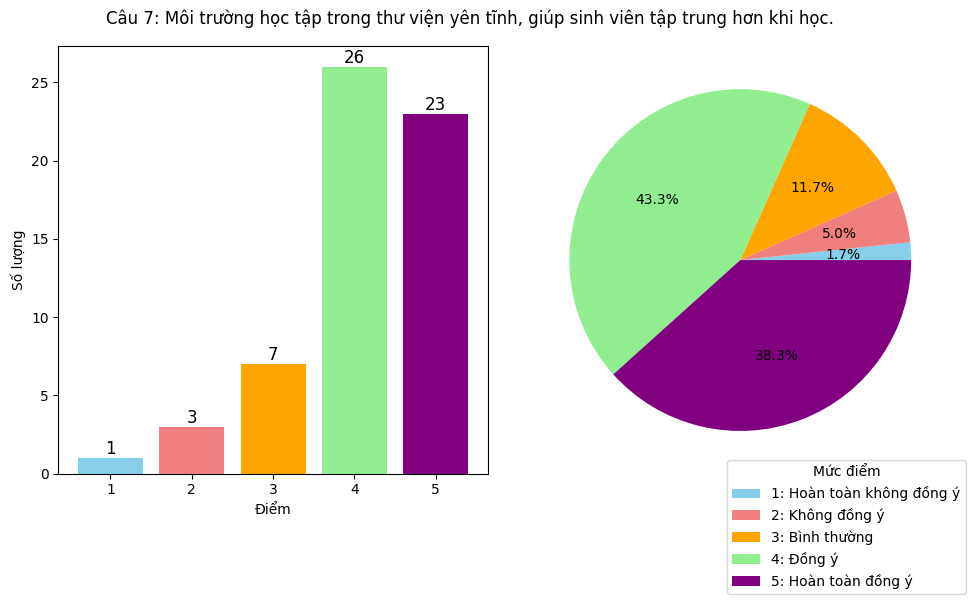

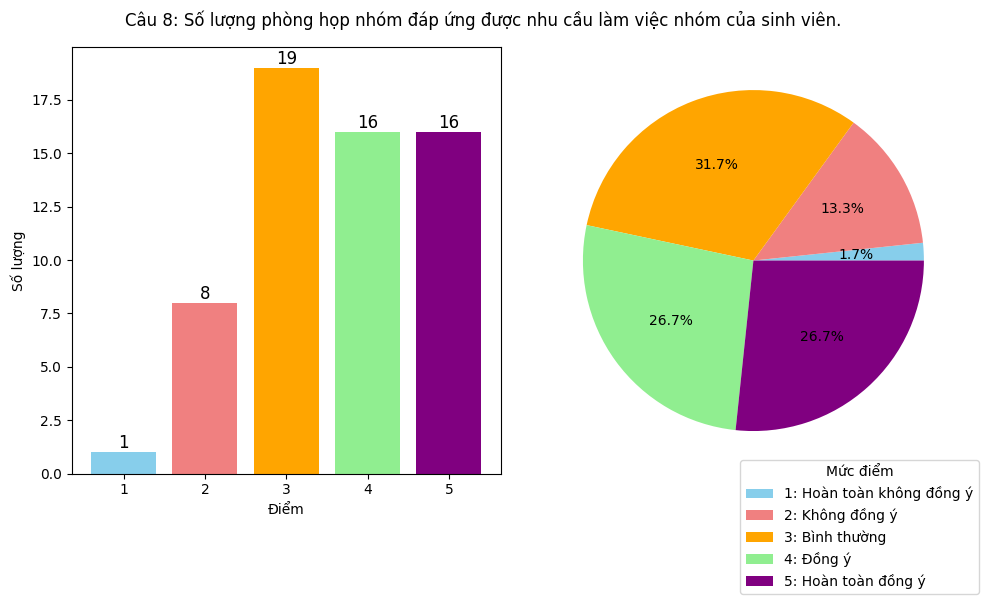

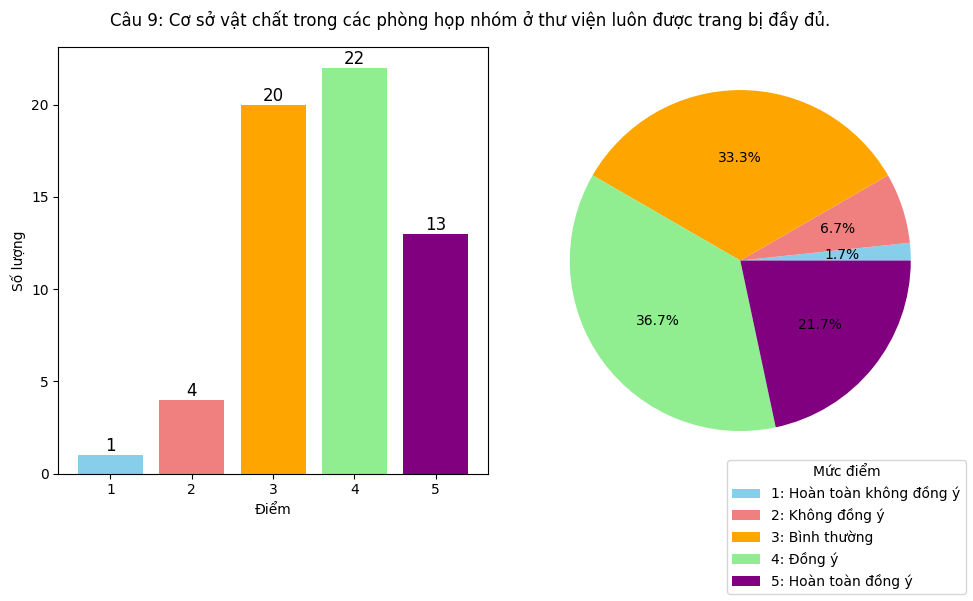

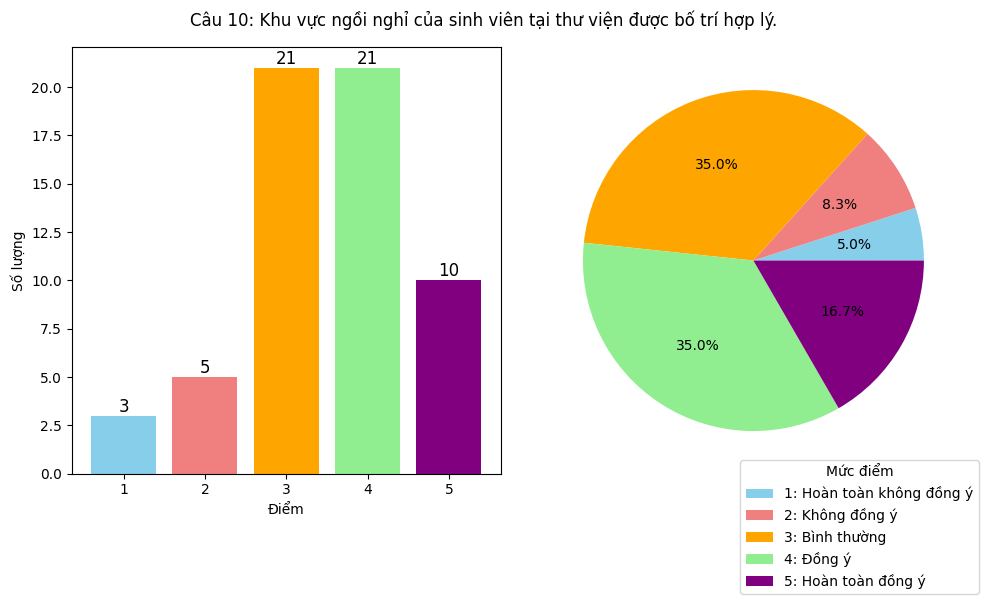

In [177]:
# Đếm số lượng của từng mức điểm trong các câu hỏi
for Q_no, quest_statement in list(quest.items())[:10]:
    Q_count = df[Q_no].value_counts().reset_index()
    Q_count.columns = ['diem', 'so_luong']
    Q_count = pd.merge(likert, Q_count, on='diem', how='left').fillna(0).astype({'so_luong': int})
    colors = ['skyblue', 'lightcoral', 'orange', 'lightgreen', 'purple']

    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    fig.suptitle(quest_statement)
    bars = ax[0].bar(Q_count.diem, Q_count.so_luong, color=colors)
    ax[0].set(xlabel='Điểm', ylabel='Số lượng', position=[.1, 0, .4, .2])

    for bar in bars:
        height = bar.get_height()
        ax[0].text(
            bar.get_x() + bar.get_width() / 2,  
            height,                         
            f'{height}',                        
            ha='center',                        
            va='bottom',                        
            fontsize=12
        )

    wedges, texts, autotexts = ax[1].pie(Q_count.so_luong, autopct=custom_autopct, labels=None, colors=colors)

    fig.legend(
        wedges,
        likert_descript,
        title='Mức điểm',
        loc='lower right',
        fontsize=10
    )

    plt.tight_layout()
    plt.savefig(f'../images/{Q_no}_summarize.png', dpi=300)
    plt.show();

q1
count    60.000000
mean      3.416667
std       1.197337
min       1.000000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: q1, dtype: float64


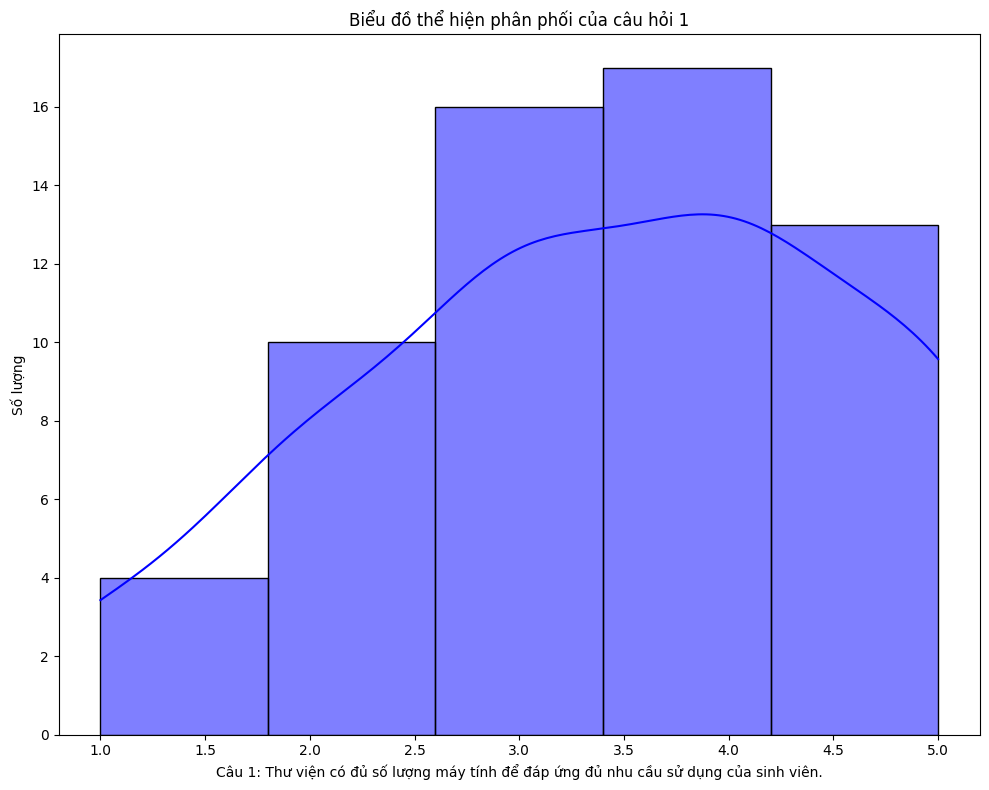

q2
count    60.000000
mean      3.450000
std       1.032112
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: q2, dtype: float64


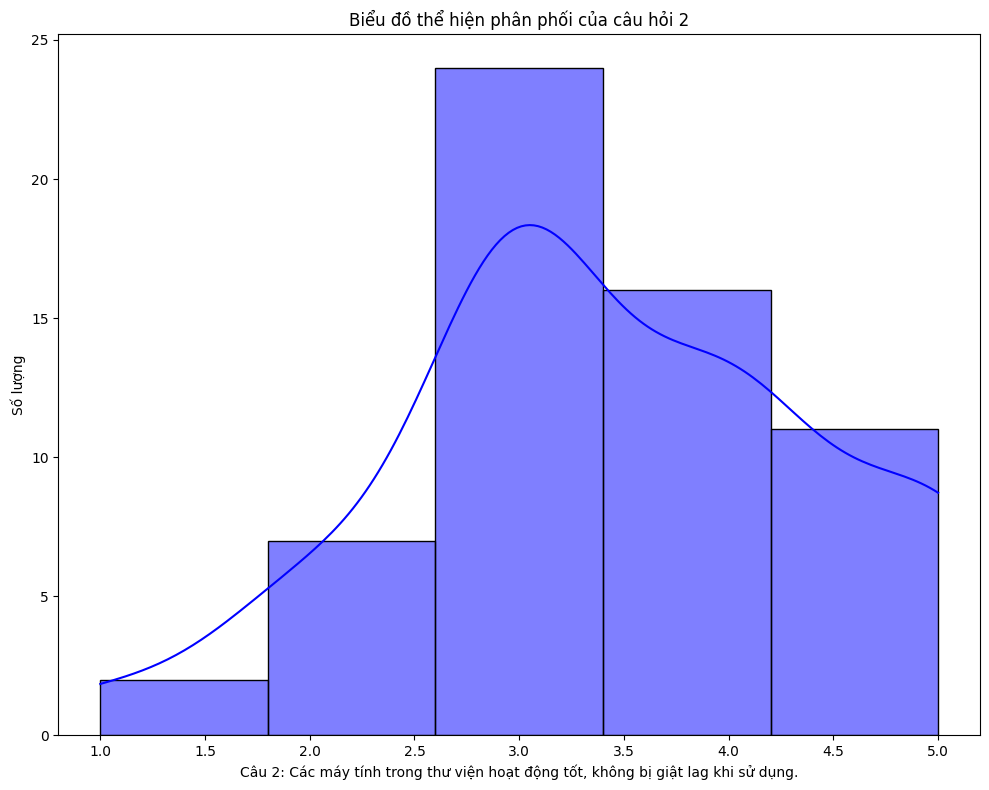

q3
count    60.000000
mean      3.466667
std       1.016252
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: q3, dtype: float64


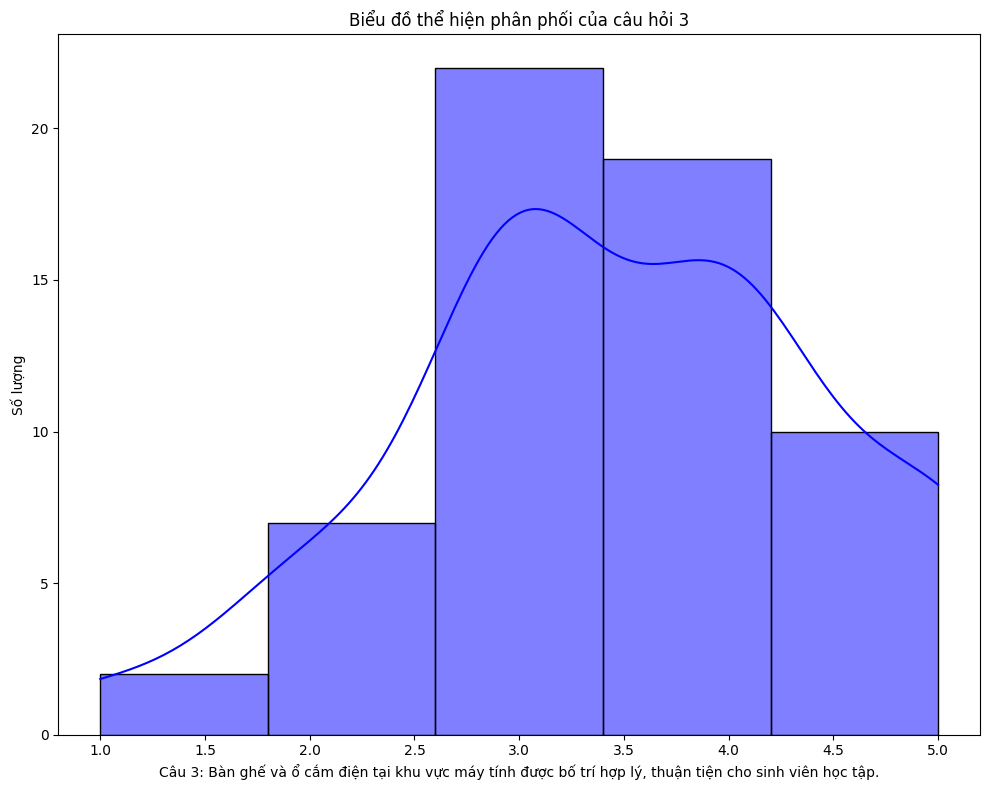

q4
count    60.000000
mean      3.816667
std       1.171580
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: q4, dtype: float64


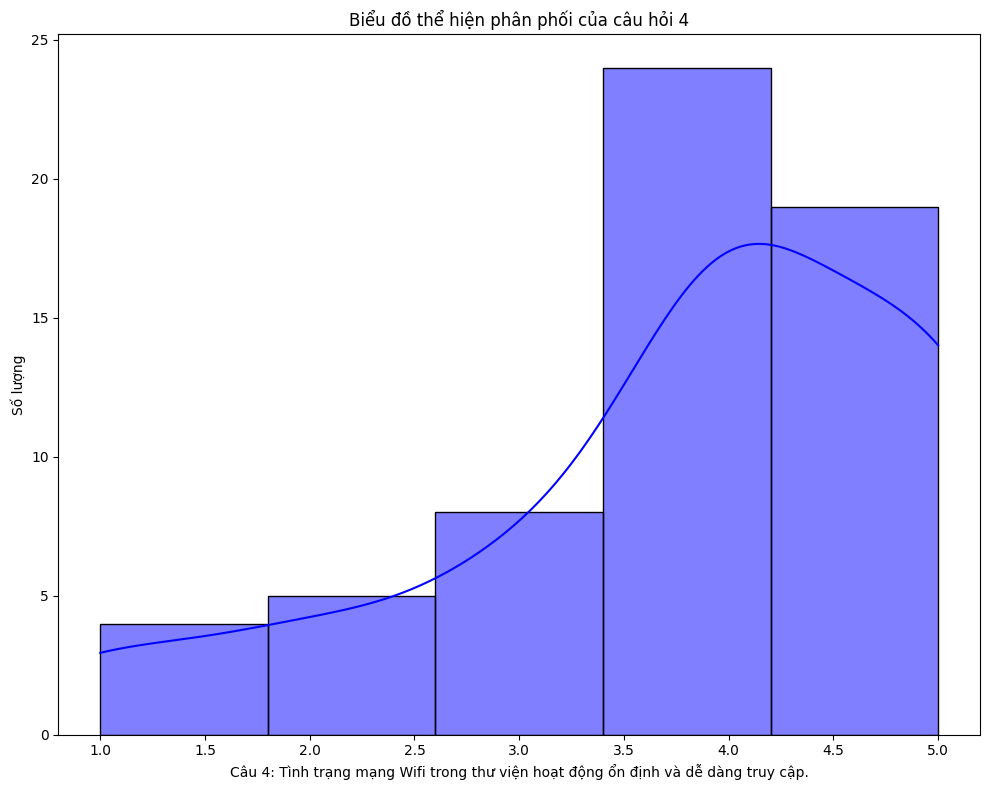

q5
count    60.000000
mean      4.166667
std       0.905102
min       1.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: q5, dtype: float64


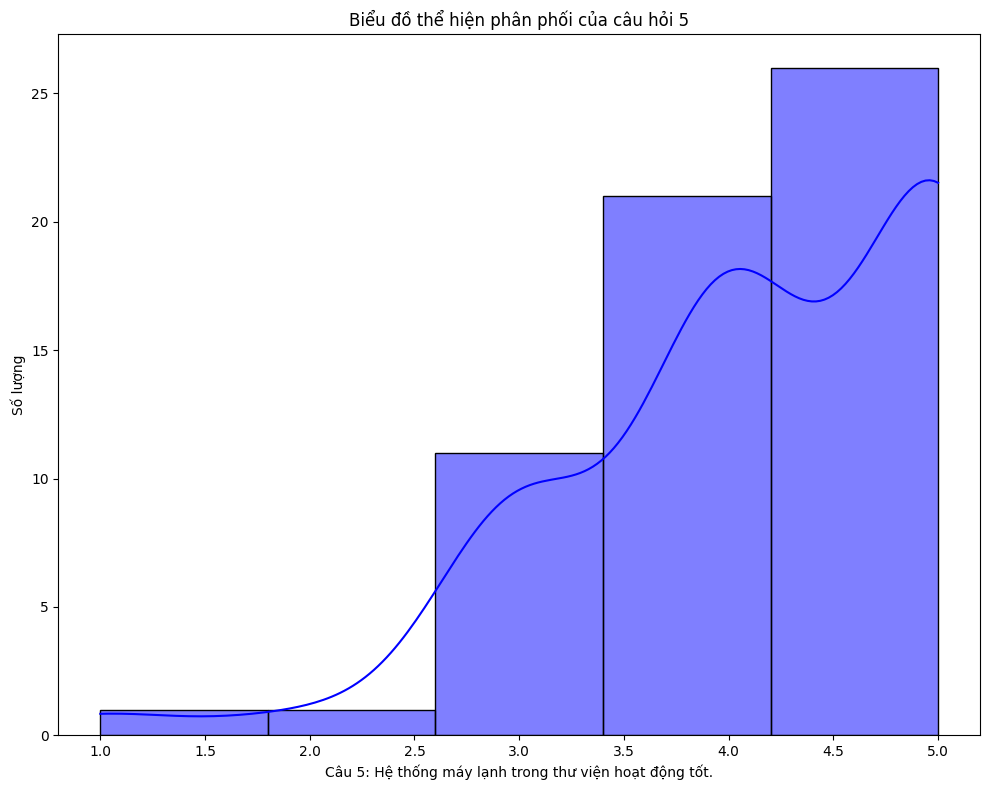

q6
count    60.000000
mean      3.833333
std       0.941810
min       1.000000
25%       3.000000
50%       4.000000
75%       4.250000
max       5.000000
Name: q6, dtype: float64


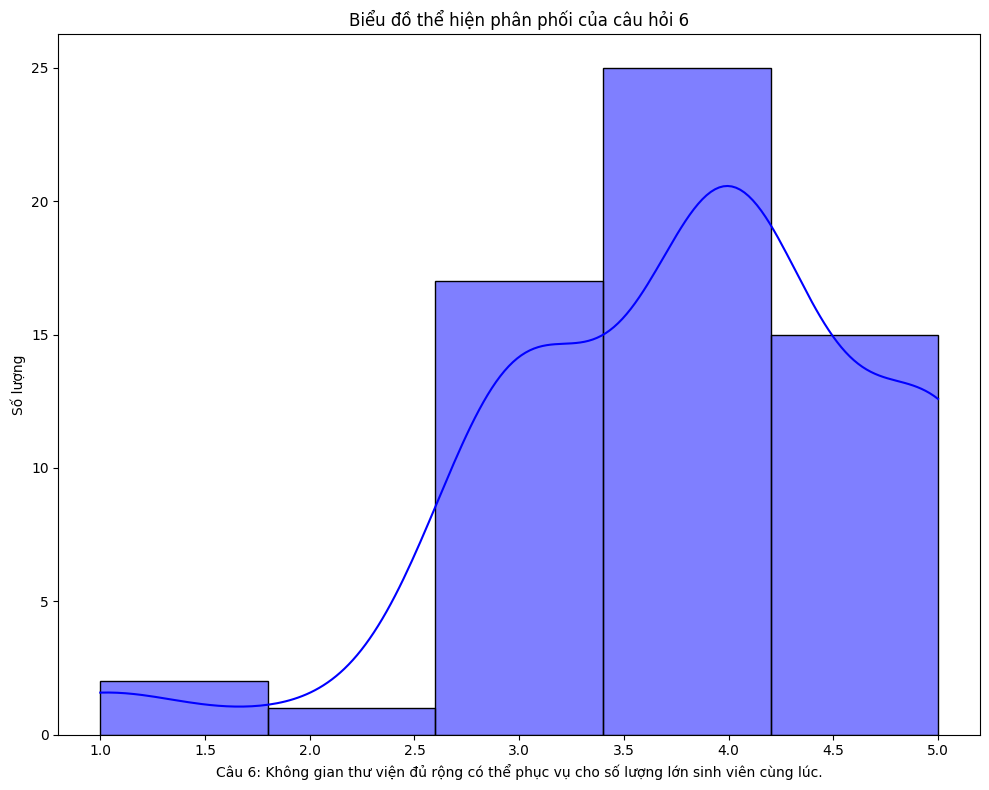

q7
count    60.000000
mean      4.116667
std       0.922261
min       1.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: q7, dtype: float64


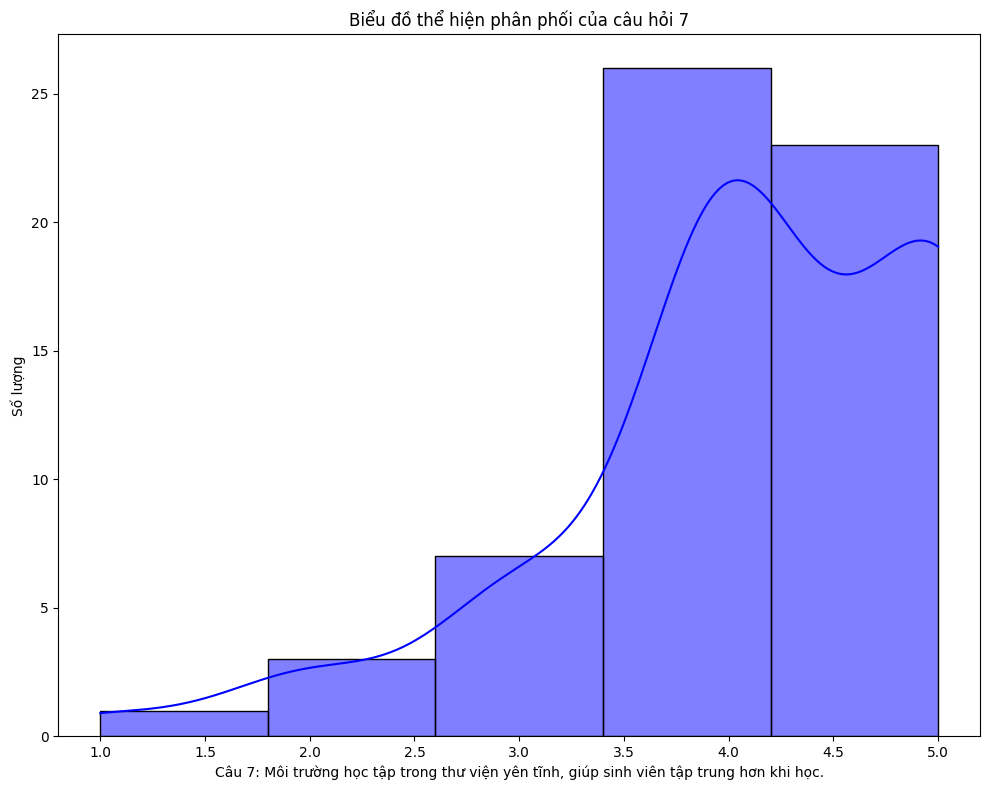

q8
count    60.000000
mean      3.633333
std       1.073039
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: q8, dtype: float64


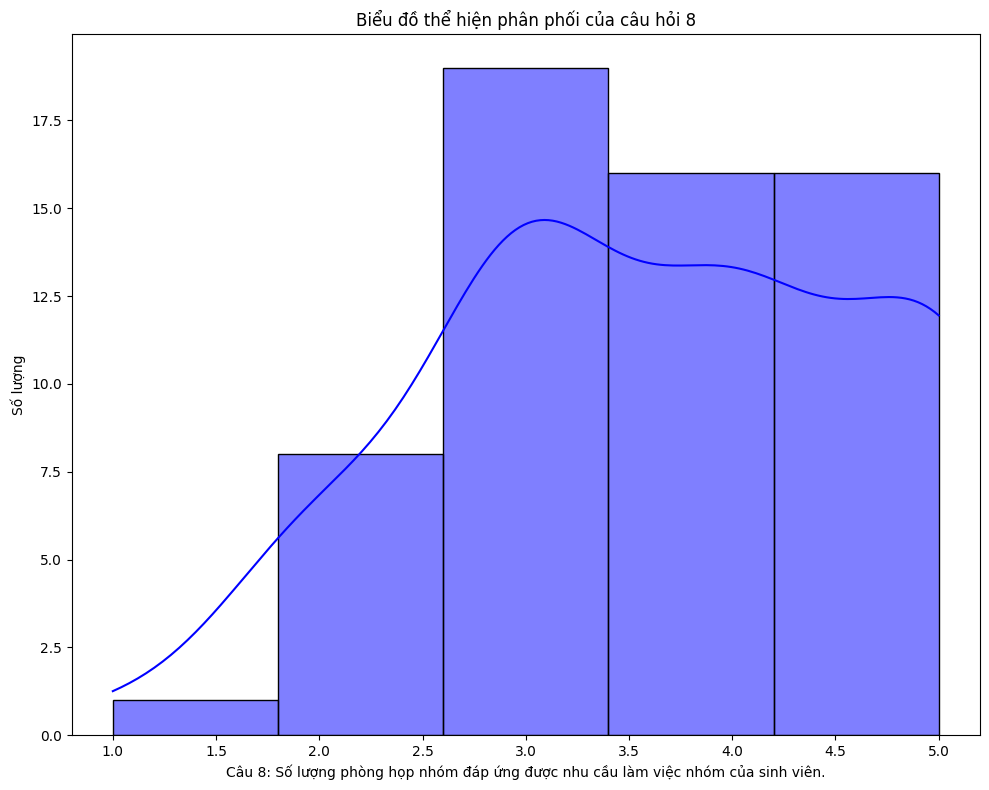

q9
count    60.000000
mean      3.700000
std       0.944206
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: q9, dtype: float64


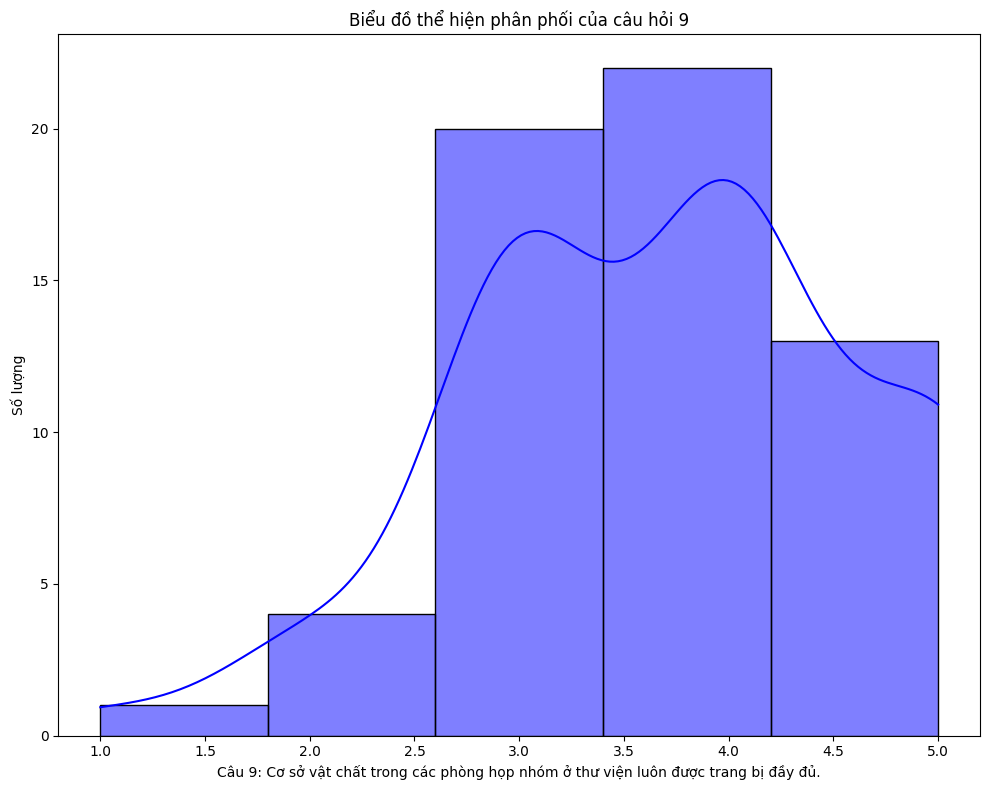

q10
count    60.000000
mean      3.500000
std       1.033342
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: q10, dtype: float64


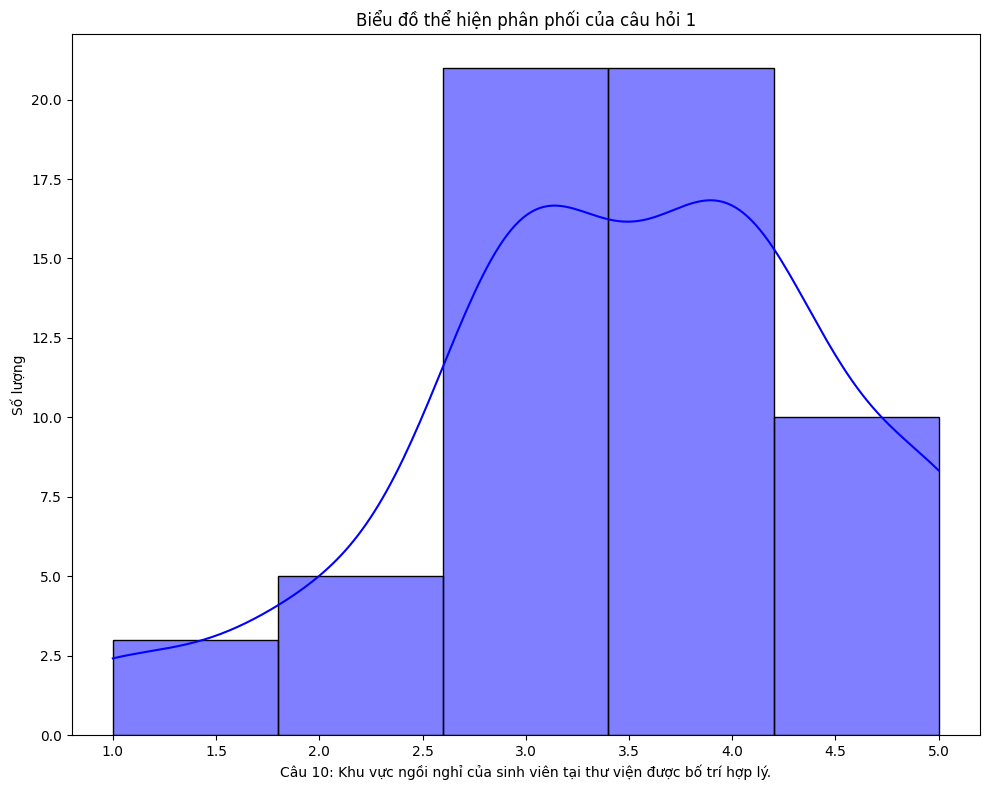

In [178]:
# Thực hiện các phân tích phục vụ cho báo cáo
for Q_no, quest_statement in list(quest.items())[:10]:
    Q_count = df[Q_no]
    print(f'{Q_no}\n', '='*80)

    print(Q_count.describe())
    plt.figure(figsize=(10, 8))
    sns.histplot(data=Q_count, bins=5, stat="count", kde=True, color="blue", edgecolor="black")
    plt.title(f"Biểu đồ thể hiện phân phối của câu hỏi {Q_no[1]}")
    plt.xlabel(quest_statement)
    plt.ylabel('Số lượng')

    plt.tight_layout()
    plt.savefig(f'../images/{Q_no}_report.png', dpi=300)
    plt.show();

In [179]:
for Q_no, quest_statement in list(quest.items())[10:14]:
    Q_count = df[Q_no]
    print(f'{Q_no}\n', '='*80)

    print(Q_count.describe())

q11
count           60
unique          50
top       Không có
freq             7
Name: q11, dtype: object
q12
count      60
unique     34
top       Tốt
freq       14
Name: q12, dtype: object
q13
count           60
unique          34
top       Không có
freq            13
Name: q13, dtype: object


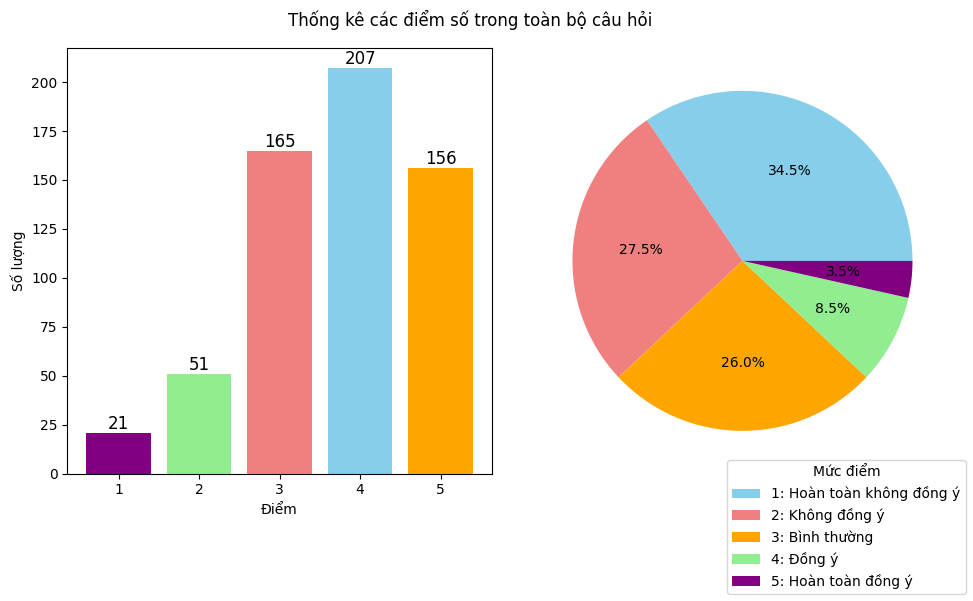

In [197]:
# Đếm số lượng của từng mức điểm trong toàn bộ câu hỏi
df_ques = df.iloc[:, 6:16]
tmp = pd.melt(df_ques)
score_whole_ques_count = tmp['value'].value_counts().reset_index()
colors = ['skyblue', 'lightcoral', 'orange', 'lightgreen', 'purple']


fig, ax = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle('Thống kê các điểm số trong toàn bộ câu hỏi')
bars = ax[0].bar(score_whole_ques_count.value, score_whole_ques_count['count'], color=colors)
ax[0].set(xlabel='Điểm', ylabel='Số lượng', position=[.1, 0, .4, .2])

for bar in bars:
    height = bar.get_height()
    ax[0].text(
        bar.get_x() + bar.get_width() / 2,  
        height,                         
        f'{height}',                        
        ha='center',                        
        va='bottom',                        
        fontsize=12
        )

wedges, texts, autotexts = ax[1].pie(score_whole_ques_count['count'], autopct='%1.1f%%', labels=None, colors=colors)

fig.legend(
    wedges,
    likert_descript,
    title='Mức điểm',
    loc='lower right',
    fontsize=10
)

plt.tight_layout()
plt.savefig('../images/likert_all_quest.png', dpi=300)
plt.show();

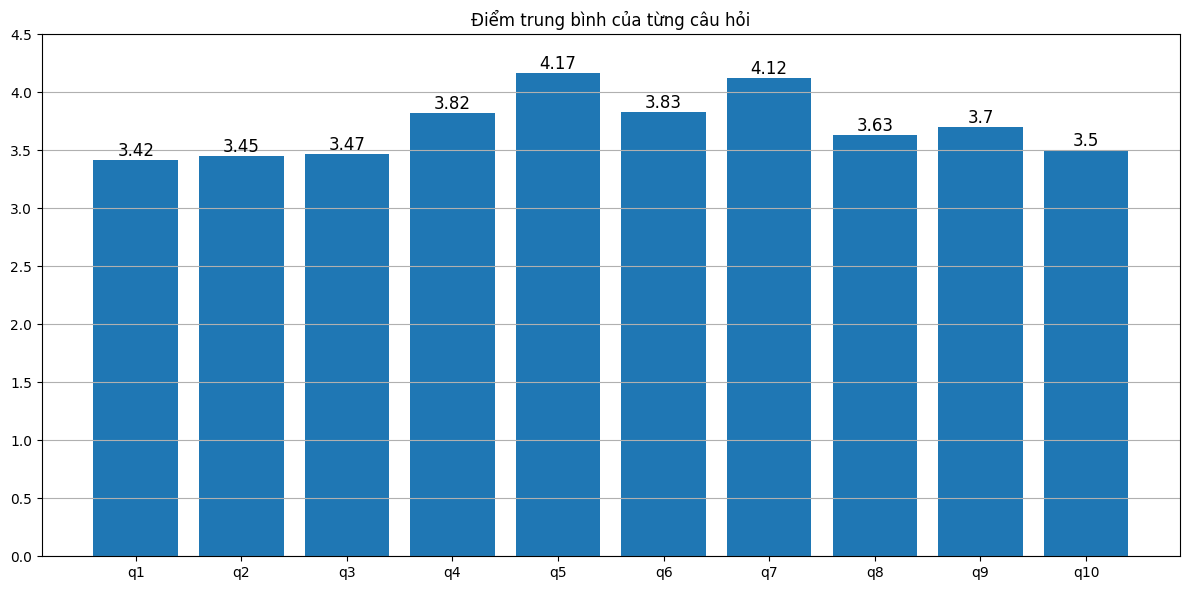

In [181]:
# Điểm số trung bình của các câu hỏi
avg_score = df_ques.mean().round(2).reset_index().rename(columns={'index': 'cau_hoi', 0: 'diem_tb'})
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_score['cau_hoi'], avg_score['diem_tb'])
plt.title('Điểm trung bình của từng câu hỏi')
plt.grid(axis='y')
plt.yticks(np.arange(0, 5, .5))

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height,                         
        f'{height}',                        
        ha='center',                        
        va='bottom',                        
        fontsize=12
        )
plt.tight_layout()
plt.savefig('../images/avg_score.png', dpi=300)
plt.show();

In [182]:
# Thực hiện phân tích cho các câu hỏi dạng text
plt.rcParams['font.family'] = ['DejaVu Sans']

In [ ]:
equipment_keywords = {
            'máy tính': ['máy tính', 'máy', 'cpu', 'computer'],
            'mạng internet': ['wifi', 'mạng', 'internet', 'net'],
            'điện': ['ổ điện', 'ổ cắm', 'điện', 'sạc', 'cắm điện'],
            'máy lạnh': ['máy lạnh', 'điều hòa', 'mát', 'lạnh'],
            'bàn ghế': ['bàn', 'ghế', 'bàn ghế', 'chỗ ngồi'],
            'phòng': ['phòng', 'phòng học', 'phòng họp', 'không gian'],
            'tài liệu': ['sách', 'tài liệu', 'tài liệu tham khảo', 'sách tham khảo'],
            'khác': ['toilet', 'nghỉ ngơi', 'thang máy']
        }

positive_words = [
            'tốt', 'tuyệt vời', 'hoàn hảo', 'nhiệt tình', 'thân thiện', 
            'tận tâm', 'chu đáo', 'vui vẻ', 'hiền', 'dễ thương', 
            'ổn', 'hòa đồng', 'lịch sự', 'quan tâm'
        ]

negative_words = [
            'tệ', 'kém', 'chán', 'khó chịu', 'thô lỗ', 'không tốt',
            'tạm', 'bình thường', 'cần cải thiện'
        ]


df_text = df.iloc[:, 16:19]

In [ ]:
def equipment_mentioned(text_input):     
    text = text_input.lower()   
    mentions = []
    for category, keywords in equipment_keywords.items():
        for keyword in keywords:
            if keyword in text:
                mentions.append(category)
                break
        
    return mentions

In [ ]:
def analyze_sentiment(text_input):        
    text = text_input.lower()
    positive_count = sum(1 for word in positive_words if word in text)
    negative_count = sum(1 for word in negative_words if word in text)
                
    if positive_count > negative_count:
        return 'positive'
    elif negative_count > positive_count:
        return 'negative'
    else:
        return 'neutral'

In [186]:
q11_data = df_text['q11']
suggestion = []
no_suggestion = []
equipment_mentions = []

for resp in q11_data:            
    if any(neg in resp for neg in ['không', 'không có', 'không biết', 'không ý kiến']):
        no_suggestion.append(resp)
    else:
        suggestion.append(resp)
        mentions = equipment_mentioned(resp)
        equipment_mentions.extend(mentions)

print(f"Tổng số phản hồi: {len(q11_data)}")
print(f"Có ý kiến đề xuất: {len(suggestion)} ({len(suggestion)/len(q11_data)*100:.1f}%)")
print(f"Không có ý kiến: {len(no_suggestion)} ({len(no_suggestion)/len(q11_data)*100:.1f}%)")
print(f"\n--- THIẾT BỊ/DỊCH VỤ CẦN CẢI THIỆN NHIỀU NHẤT ---")
equipment_count = Counter(equipment_mentions)
for equipment, count in equipment_count.most_common():
    print(f"{equipment}: {count} lần đề cập ({count/len(suggestion)*100:.1f}% trong các ý kiến có đề xuất)")

Tổng số phản hồi: 60
Có ý kiến đề xuất: 59 (98.3%)
Không có ý kiến: 1 (1.7%)

--- THIẾT BỊ/DỊCH VỤ CẦN CẢI THIỆN NHIỀU NHẤT ---
máy tính: 11 lần đề cập (18.6% trong các ý kiến có đề xuất)
điện: 10 lần đề cập (16.9% trong các ý kiến có đề xuất)
bàn ghế: 6 lần đề cập (10.2% trong các ý kiến có đề xuất)
mạng internet: 6 lần đề cập (10.2% trong các ý kiến có đề xuất)
phòng: 6 lần đề cập (10.2% trong các ý kiến có đề xuất)
tài liệu: 2 lần đề cập (3.4% trong các ý kiến có đề xuất)
máy lạnh: 2 lần đề cập (3.4% trong các ý kiến có đề xuất)
khác: 1 lần đề cập (1.7% trong các ý kiến có đề xuất)


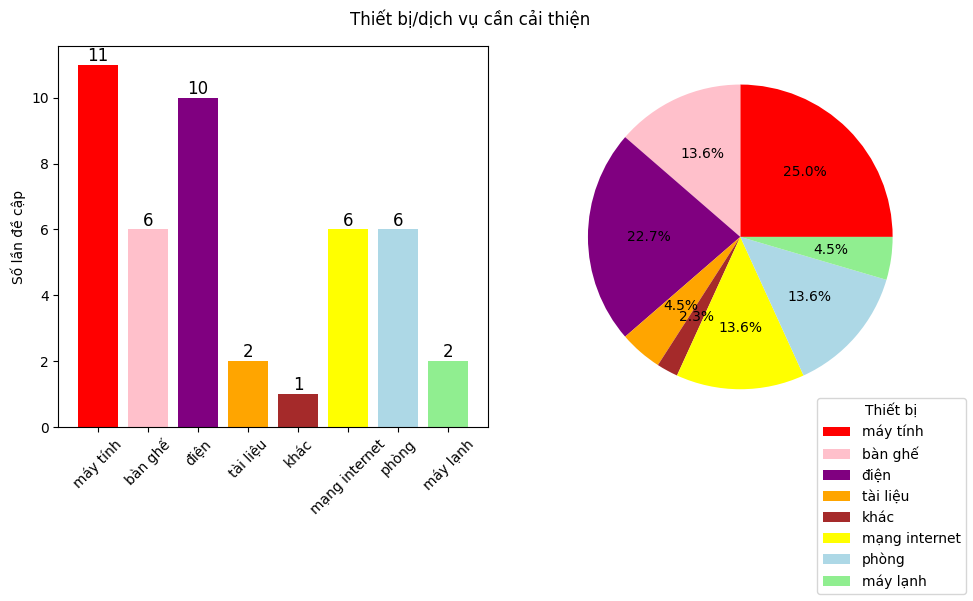

In [187]:
equipment_names = list(equipment_count.keys())
equipment_counts = list(equipment_count.values())
colors = ['red', 'pink', 'purple', 'orange', 'brown','yellow', 'lightblue', 'lightgreen']

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle('Thiết bị/dịch vụ cần cải thiện')
bars = ax[0].bar(equipment_names, equipment_counts, color=colors)
ax[0].set(ylabel='Số lần đề cập', position=[.1, 0, .4, .2])
ax[0].tick_params(axis='x', rotation=45)

for bar in bars:
    height = bar.get_height()
    ax[0].text(
        bar.get_x() + bar.get_width() / 2,  
        height,                         
        f'{height}',                        
        ha='center',                        
        va='bottom',                        
        fontsize=12
        )
    
wedges, texts, autotexts = ax[1].pie(equipment_counts, autopct=custom_autopct, labels=None, colors=colors)   

fig.legend(
        wedges,
        equipment_names,
        title='Thiết bị',
        loc='lower right',
        fontsize=10
    )

plt.tight_layout()
plt.savefig('../images/Q11_report_summarize.png', dpi=300)
plt.show();

In [188]:
q12_data = df_text['q12']

sentiment_results = []
sentiment_counts = {'positive': 0, 'negative': 0, 'neutral': 0}
        
for response in q12_data:
    sentiment = analyze_sentiment(response)
    sentiment_results.append((response, sentiment))
    sentiment_counts[sentiment] += 1

total = len(q12_data)
print(f"Tổng số phản hồi: {total}")
print(f"Tích cực: {sentiment_counts['positive']} ({sentiment_counts['positive']/total*100:.1f}%)")
print(f"Tiêu cực: {sentiment_counts['negative']} ({sentiment_counts['negative']/total*100:.1f}%)")
print(f"Trung tính: {sentiment_counts['neutral']} ({sentiment_counts['neutral']/total*100:.1f}%)")
        

Tổng số phản hồi: 60
Tích cực: 18 (30.0%)
Tiêu cực: 1 (1.7%)
Trung tính: 41 (68.3%)


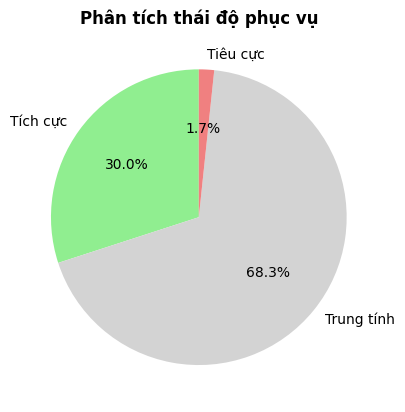

In [189]:
sentiment_labels = ['Tích cực', 'Trung tính', 'Tiêu cực']
sentiment_values = [
    sentiment_counts['positive'],
    sentiment_counts['neutral'],
    sentiment_counts['negative']
]

colors = ['lightgreen', 'lightgray', 'lightcoral']

plt.pie(sentiment_values, labels=sentiment_labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Phân tích thái độ phục vụ', fontweight='bold')

plt.savefig('../images/Q12_report_summarize.png', dpi=300)
plt.show();

In [190]:
q13_data = df_text['q13']
request = []
no_request = []
equipment_mentions = []
        
for resp in q13_data:            
    if any(neg in resp for neg in ['không', 'không có', 'không biết']):
        no_request.append(resp)
    else:
        request.append(resp)
        mentions = equipment_mentioned(resp)
        equipment_mentions.extend(mentions)

print(f"Tổng số phản hồi: {len(q13_data)}")
print(f"Có yêu cầu nâng cấp: {len(request)} ({len(request)/len(q13_data)*100:.1f}%)")
print(f"Không có yêu cầu: {len(no_request)} ({len(no_request)/len(q13_data)*100:.1f}%)")

print(f"\n--- THIẾT BỊ/DỊCH VỤ CẦN NÂNG CẤP NHIỀU NHẤT ---")
equipment_count = Counter(equipment_mentions)
        
for equipment, count in equipment_count.most_common():
    print(f"{equipment}: {count} lần đề cập ({count/len(request)*100:.1f}% trong các yêu cầu)")

Tổng số phản hồi: 60
Có yêu cầu nâng cấp: 56 (93.3%)
Không có yêu cầu: 4 (6.7%)

--- THIẾT BỊ/DỊCH VỤ CẦN NÂNG CẤP NHIỀU NHẤT ---
máy tính: 9 lần đề cập (16.1% trong các yêu cầu)
điện: 7 lần đề cập (12.5% trong các yêu cầu)
bàn ghế: 3 lần đề cập (5.4% trong các yêu cầu)
phòng: 3 lần đề cập (5.4% trong các yêu cầu)
mạng internet: 2 lần đề cập (3.6% trong các yêu cầu)
máy lạnh: 2 lần đề cập (3.6% trong các yêu cầu)
khác: 1 lần đề cập (1.8% trong các yêu cầu)


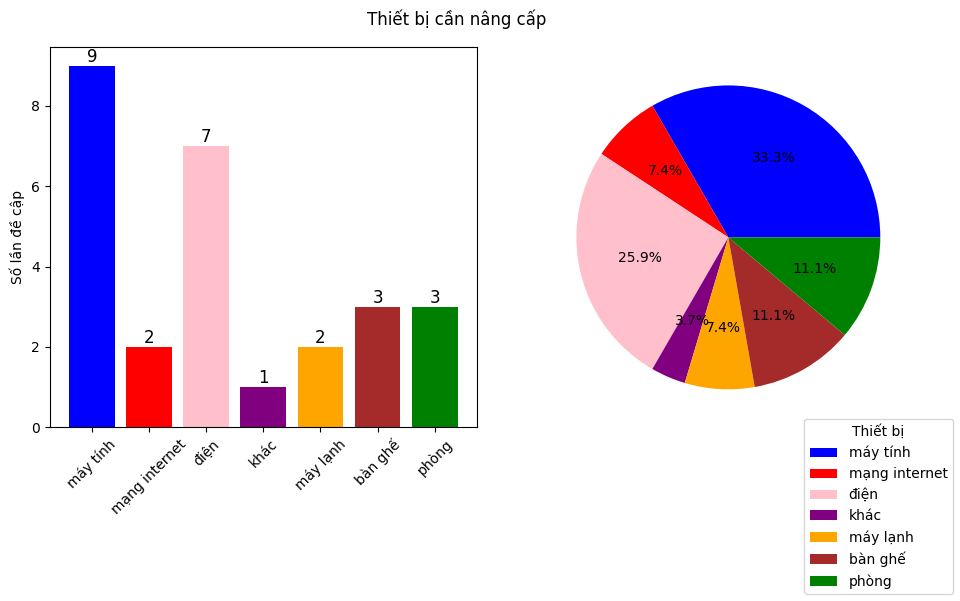

In [191]:
q13_data = df_text['q13']

equipment_names = list(equipment_count.keys())
equipment_counts = list(equipment_count.values())
colors=['blue', 'red', 'pink', 'purple', 'orange', 'brown', 'green']

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle('Thiết bị cần nâng cấp')
   
bars = ax[0].bar(equipment_names, equipment_counts, color=colors)
ax[0].set(ylabel='Số lần đề cập', position=[.1, 0, .4, .2])
ax[0].tick_params(axis='x', rotation=45)

for bar in bars:
    height = bar.get_height()
    ax[0].text(
        bar.get_x() + bar.get_width() / 2,  
        height,                         
        f'{height}',                        
        ha='center',                        
        va='bottom',                        
        fontsize=12
        )
    
wedges, texts, autotexts = ax[1].pie(equipment_counts, autopct=custom_autopct, labels=None, colors=colors)  

fig.legend(
        wedges,
        equipment_names,
        title='Thiết bị',
        loc='lower right',
        fontsize=10
    )

plt.tight_layout()
plt.savefig('../images/Q13_report_summarize.png', dpi=300)
plt.show();

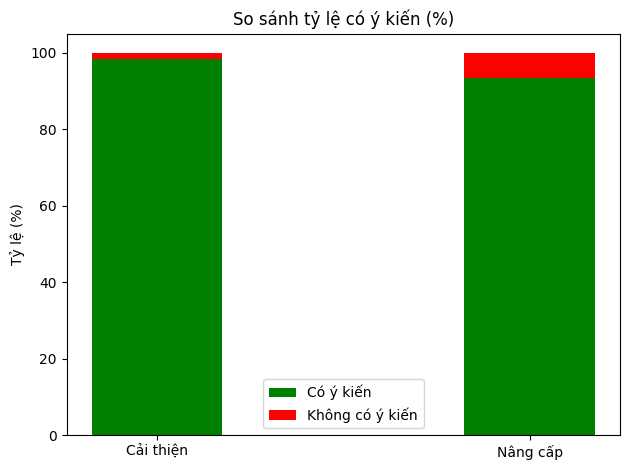

In [192]:
categories = ['Cải thiện', 'Nâng cấp']
has_opinion = [
    len(suggestion)/total*100,
    len(request)/total*100
]
no_opinion = [100 - x for x in has_opinion]
        
width = 0.35
x = np.arange(len(categories))
        
plt.bar(x, has_opinion, width, label='Có ý kiến', color='green')
plt.bar(x, no_opinion, width, bottom=has_opinion, label='Không có ý kiến', color='red')
        
plt.title('So sánh tỷ lệ có ý kiến (%)')
plt.ylabel('Tỷ lệ (%)')
plt.xticks([0, 1], categories)
plt.legend()
        
plt.tight_layout()
plt.savefig('../images/compare_opinion.png', dpi=300)
plt.show()

#### Tìm mối tương quan giữa các câu hỏi và kết quả

In [193]:
# Xác định mức độ hài lòng của sinh viên đối với thư viện thông qua các câu hỏi 1 đến 10
df['do_hai_long_chung'] = round(df_ques.mean(axis=1), 3)
df.head(5)

,stt,ho_ten,mssv,gioi_tinh,khoa_hoc,khoa,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,do_hai_long_chung
0,1,Phạm Tiến Hưng,23632401,1,3,Động lực,4,3,4,3,5,4,4,3,3,3,Không có,Không có,Không có,3.6
1,2,Lê Ngọc Trường Giang,24697331,1,4,Thương mại du lịch,3,3,4,3,5,4,5,5,4,5,Không có,Không có,Không có,4.1
2,3,Nguyễn Thị Trúc Hà,24696461,2,4,Quản trị kinh doanh,3,4,2,5,4,4,4,2,4,3,Không có,Không có,Không có,3.5
3,4,Mohammad Hanufi,23704721,1,3,Quản trị kinh doanh,3,3,3,4,3,4,5,3,4,4,Không có ý kiến,Tốt,Nâng cao hệ thống máy tính,3.6
4,5,Lê Minh Thắng,23687491,1,3,Quản trị kinh doanh,3,3,3,4,5,3,4,3,3,3,"Phòng trang bị thêm máy, Có thể cho thêm ghế ngồi",Cố hiền dễ thương,Không có,3.4


In [194]:
# Tính độ tương quan Pearson giữa các câu hỏi với độ hài lòng chung
df_for_corr = pd.concat([df_ques, df[['do_hai_long_chung']]], axis=1)
corr_mat = pd.DataFrame(df_for_corr.corr().loc['do_hai_long_chung'].drop('do_hai_long_chung'))
corr_mat.columns = ['he_so']

<Axes: >

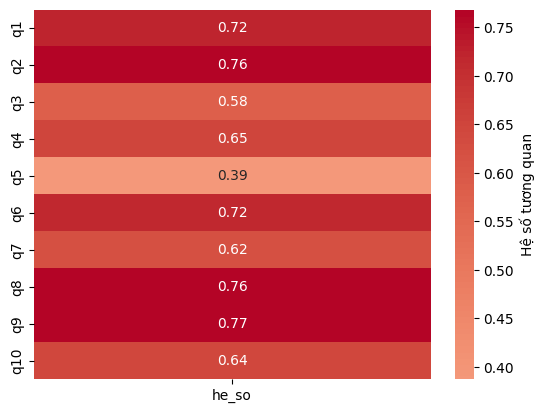

In [195]:
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', center=0, cbar_kws={'label': 'Hệ số tương quan'})

#### Các yếu tố quan trọng ảnh hưởng đến độ hài lòng của sinh viên

In [196]:
# Top 3 câu hỏi có điểm số trung bình cao nhất
top3_importance = corr_mat.sort_values(by='he_so', ascending=False)[:3]
top3_importance

,he_so
q9,0.768153
q2,0.764140
q8,0.762560
